<a href="https://colab.research.google.com/github/libclick/DATA201/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#THE DATA: source Framingham Heart Study Dataset 
#(https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data)

This study is a record of medical data recorder on patients of Framingham, MA in order to study the risk of developing heart disease at the 10-year mark following, and based upon, the initial readings.

In [ ]:
#fr = pd.read_csv("/Users/elizabethclick/Downloads/framingham.csv")
fr = pd.read_csv("framingham.csv")

In [ ]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
#Clean data - column names to lower case
fr = fr.rename(columns=str.lower)
fr.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#Basic column statistics
print(fr.describe())

              male          age  ...      glucose   tenyearchd
count  4238.000000  4238.000000  ...  3850.000000  4238.000000
mean      0.429212    49.584946  ...    81.966753     0.151958
std       0.495022     8.572160  ...    23.959998     0.359023
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    71.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...    87.000000     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 16 columns]


In [ ]:
fr.isna().sum()

male                 0
age                  0
education          105
currentsmoker        0
cigsperday          29
bpmeds              53
prevalentstroke      0
prevalenthyp         0
diabetes             0
totchol             50
sysbp                0
diabp                0
bmi                 19
heartrate            1
glucose            388
tenyearchd           0
dtype: int64

In [ ]:
#Examine data and determine how to handle nulls:

#Male:  0 = female, 1= male; no nulls - DISCRETE/KEEP

#Age: age in years; no nulls

#Education:    1.0 =  some hs    ,  2.0 =  hs/ged ,  3.0 = some college/voc   4.0  =  college   ; 105 nulls; 
#use mean rounded DISCRETE/KEEP

#Current Smoker: 0 = nonsmoker, 1 = smoker, DISCRETE DROP; redundant with #cigarettes per day

#Cigarettes per Day: 29 nulls, use mean of existing values to replace

#BP Meds: 0 = no meds, 1 = on meds;  54 nulls; use mean DISCRETE

#PrevStroke: 0 = no history, 1 = history; no nulls DISCRETE

#PrevHypertension:: 0 = no history, 1 = history; no nulls DISCRETE
 
#Diabetes:  0 = no history,  1 = history; no nulls DISCRETE

#Total Cholesterol (mg/dl): 50 nulls; use mean

#Systolic BP: no nulls

#Diastolic BP: no nulls
 
#BMI: body mass index; 19 nulls, use mean

#Heart Rate: 1 null, use mean, rounded

#Glucose: blood sugar; 388 null, use mean

#TenYearCHD: 0 = no risk of developing CHD in next 109 years; 1 = at risk of developing CHD in next 10 years; no nulls DISCRETE/TARGET



In [ ]:
#Fill null values
fr=fr.fillna(fr.mean())
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentsmoker    4238 non-null   int64  
 4   cigsperday       4238 non-null   float64
 5   bpmeds           4238 non-null   float64
 6   prevalentstroke  4238 non-null   int64  
 7   prevalenthyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totchol          4238 non-null   float64
 10  sysbp            4238 non-null   float64
 11  diabp            4238 non-null   float64
 12  bmi              4238 non-null   float64
 13  heartrate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  tenyearchd       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Questions:  1. Which features are most important for accuracy in predicting risk? 2. Are men more likely than women to be at risk  3. Is there a minority class that needs adjustment and will that provide for better accuracy? 4. Are the variables collected sufficient for a good model using logistic regression?

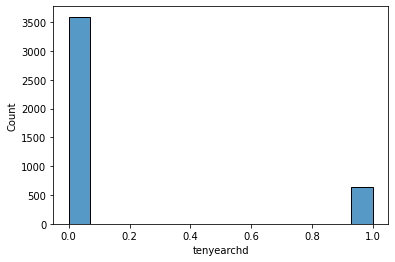

In [ ]:
#Target variable is no risk(0) and at risk(1)
sns.histplot(x = fr["tenyearchd"])
#shows existence of minority class

Look at 10 year outcome for male versus female

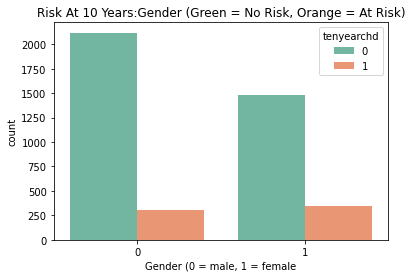

      sum
male     
0     301
1     343


0    2419
1    1819
Name: male, dtype: int64

In [ ]:
sns.countplot(x = fr["male"], hue = fr["tenyearchd"], palette = "Set2")
plt.xlabel("Gender (0 = male, 1 = female")
plt.title("Risk At 10 Years:Gender (Green = No Risk, Orange = At Risk)")
plt.show()
#Appears that females have a higher at risk rate(less females at no-risk(green), with more showing at-risk(orange))
print(fr.groupby(['male']).tenyearchd.agg(['sum']))
fr["male"].value_counts()

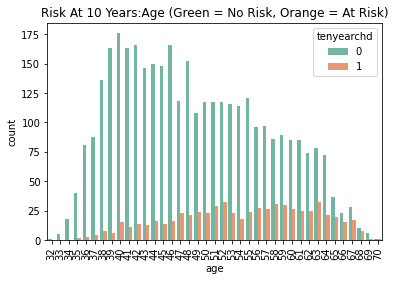

In [ ]:
sns.countplot(x = fr["age"], hue = fr["tenyearchd"], palette = "Set2")
plt.title("Risk At 10 Years:Age (Green = No Risk, Orange = At Risk)")
plt.xticks(rotation = 90)
plt.show() 

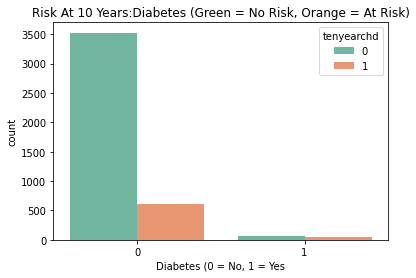

In [ ]:
sns.countplot(x = fr["diabetes"], hue = fr["tenyearchd"], palette = "Set2")
plt.title("Risk At 10 Years:Diabetes (Green = No Risk, Orange = At Risk)")
plt.xlabel("Diabetes (0 = No, 1 = Yes")
plt.show()


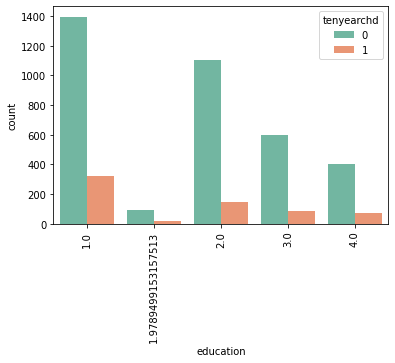

float value 1.9789 is the mean (replacement for missing values)


In [ ]:
sns.countplot(x = fr["education"], hue = fr["tenyearchd"], palette = "Set2")
plt.xticks(rotation = 90)
plt.show()
print("float value 1.9789 is the mean (replacement for missing values)")

We need to compare features one on one to look for evidence of correlation using pairplots as a visualization; also provide a table view and decide on features we may want to eliminate because of high correlation.

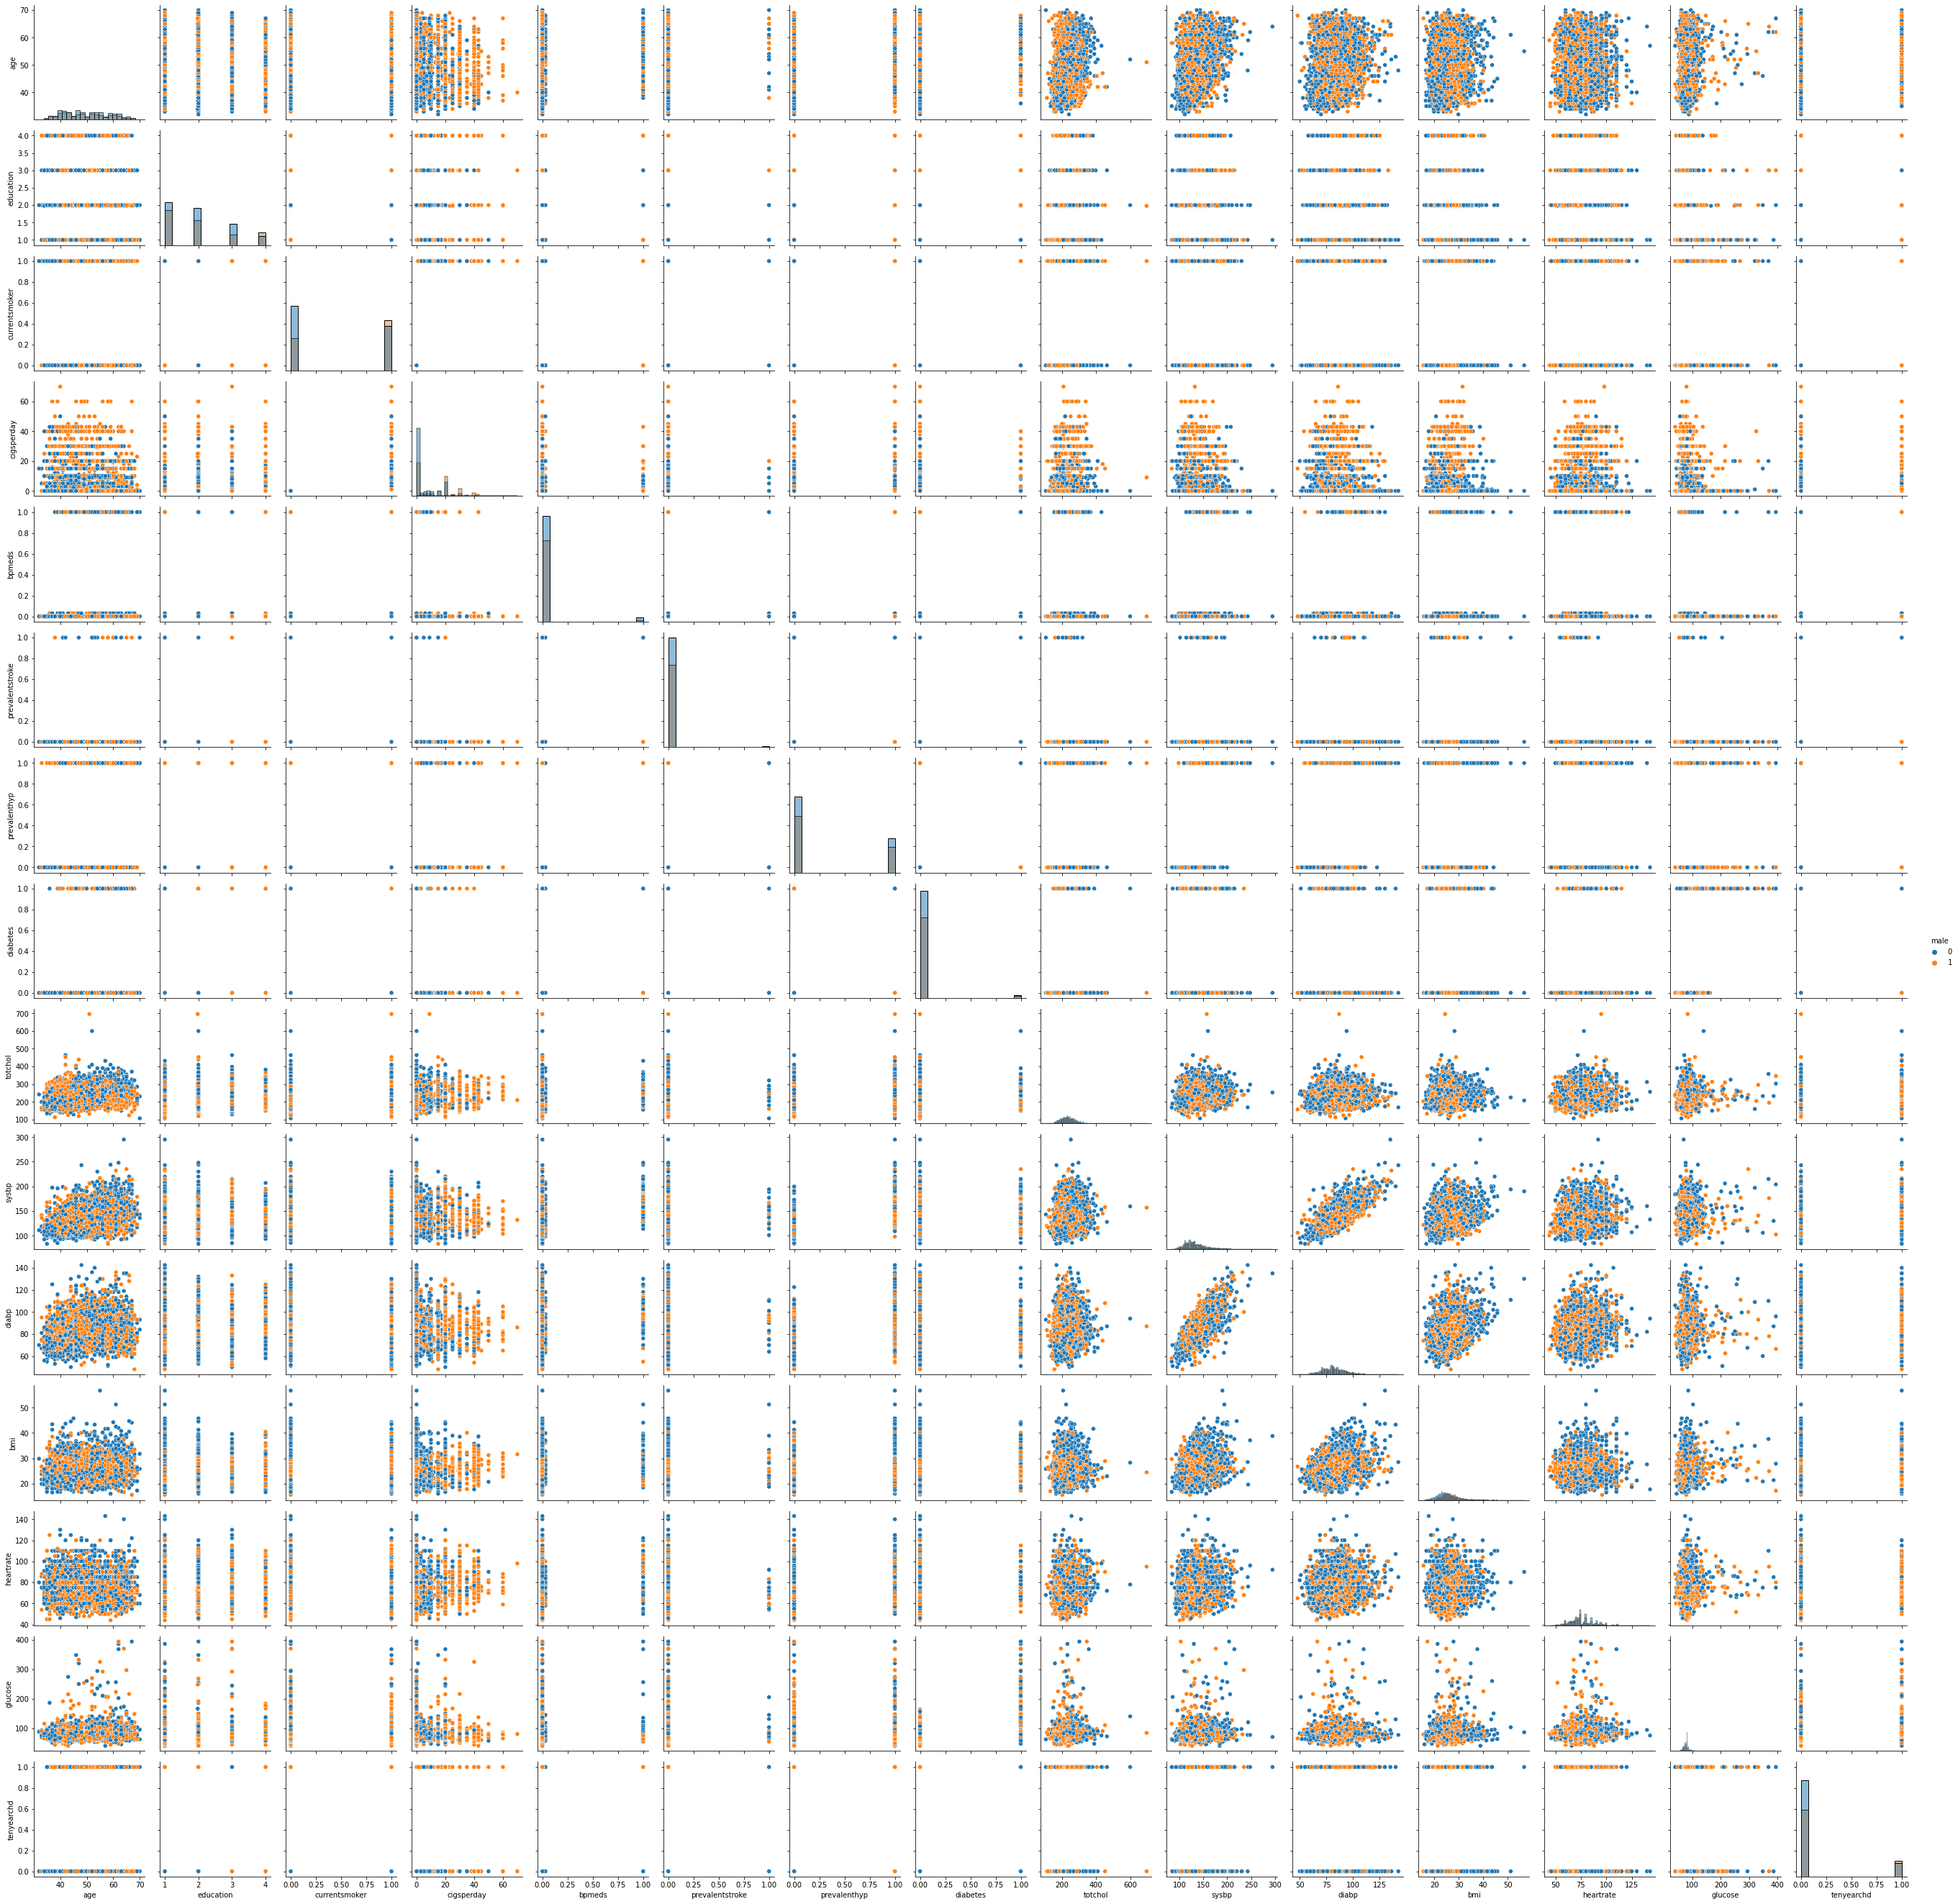

In [ ]:
g = sns.PairGrid(fr, hue="male")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
#systolic and diastolic appear to have a linear positive correlation; decision to make - drop 1; diastolic is more important
#measure to overall BP, so drop systolic

In [ ]:
corr = fr.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentsmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsperday,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
bpmeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentstroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalenthyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totchol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


FEATURE DECISIONS: Highly correlated items are currentsmoker(drop)/cigsper day(keep) because if they have a cigsper day, they are a current smoker by definition; diabetes(keep)/glucose(drop); sysbp(drop)/diabp(keep) because diastolic is actually more important of the two; diabp(keep)/prevelanthyp(drop)

In [ ]:
#From correlation matrix, decision to drop "sysbp"
fr = fr.drop(columns = ["currentsmoker", "prevalentstroke", "prevalenthyp", "glucose", "sysbp"])

The classes for the test dataset should be 0 for no risk after 10 years and 1 for at risk after 10 years. P(class=0) and P(class=1) will be determined by the LR model; in this case we will use the intercept and then apply the sigmoid function to the coefficients of each feature after the model is fitted. Relationship of the classes in the binary case gives us P(class = 0) = 1-P(class = 1)

In [ ]:
#Create features and target pandas using fr dataset, and "tenyearchd" as the target variable; again this variable
#predicts who as at risk for heart disease after 10 years.
X = fr.iloc[:,0:-1] 
y = fr.tenyearchd

#check X to verify that target column has been removed and only features remain
X.head()

,male,age,education,cigsperday,bpmeds,diabetes,totchol,diabp,bmi,heartrate
0,1,39,4.0,0.0,0.0,0,195.0,70.0,26.97,80.0
1,0,46,2.0,0.0,0.0,0,250.0,81.0,28.73,95.0
2,1,48,1.0,20.0,0.0,0,245.0,80.0,25.34,75.0
3,0,61,3.0,30.0,0.0,0,225.0,95.0,28.58,65.0
4,0,46,3.0,23.0,0.0,0,285.0,84.0,23.10,85.0


In [ ]:
#Break data into train and test using 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
#Fit the logistic regression model using the sklearn package
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)

The model output below verifies classes are 0 and 1, with an intercept of -1.9745231, and the coefficients corresponding to each of the feature variables chosen in order they were read into the dataframe. They need to be converted using sigmoid function + the intercept to predict the probability of class 0, and the probability of class 1.

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )


Classes [0 1]
Intercept [-1.97202402]
Coefficients [[ 0.1828497   0.63344958 -0.02641952  0.28084064  0.0652865   0.14548097
   0.09632282  0.21132062  0.04780285  0.00720615]]


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.839622641509434
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       1.00      0.01      0.03       138

    accuracy                           0.84       848
   macro avg       0.92      0.51      0.47       848
weighted avg       0.87      0.84      0.77       848



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[710,   0],
       [136,   2]])

As the confusion matrix shows, we see that the accuracy of predicting no risk is excellent; however, in this case, we may want to maximize true negatives which here are showing only 2 were caught, while 136 escaped the model prediction of being at risk when you may want to be telling more people that they are at risk, so they can change some of their habits, i.e. diet, exercise, medications.

Text(0.5, 257.44, 'Predicted label')

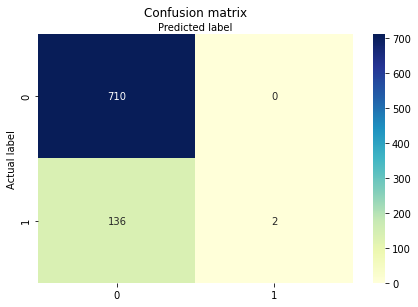

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#We will catch  2 but miss 136 of the "at_risk" category ---> probably unacceptable to miss so many at risk
#We will show 710 and miss 0  of the "no risk" category ----> 100%

In [ ]:
# Dummy classifier in SKlearn
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.839622641509434
Precision: 1.0
Recall: 0.014492753623188406


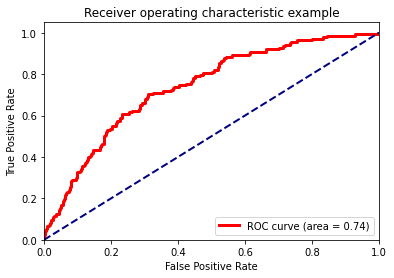

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='red',
        lw=3, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 
#0.74 ROC value indicates the model is good at predicting True positive, i.e. those at no risk after 10 years

In [ ]:
#We note minority class is the "at risk" of our target variable
fr['tenyearchd'].value_counts()

0    3594
1     644
Name: tenyearchd, dtype: int64

In [ ]:
# view our existing split fr sets 80:20 ratio

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3390, 10)
Number transactions y_train dataset:  (3390,)
Number transactions X_test dataset:  (848, 10)
Number transactions y_test dataset:  (848,)


In [ ]:
#Use SMOTE for balancing
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 506
Before OverSampling, counts of label '0': 2884 



In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (5768, 10)
After OverSampling, the shape of train_y: (5768,) 

After OverSampling, counts of label '1': 2884
After OverSampling, counts of label '0': 2884


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

LogReg.fit(X_train_res,y_train_res)


y_pred=LogReg.predict(X_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )


Classes [0 1]
Intercept [-0.00150337]
Coefficients [[ 0.18123857  0.67582132 -0.02776772  0.29986006  0.10712389  0.20542978
   0.07417295  0.23389368  0.03973276 -0.02628976]]


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.6662735849056604
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       710
           1       0.29      0.71      0.41       138

    accuracy                           0.67       848
   macro avg       0.60      0.68      0.59       848
weighted avg       0.82      0.67      0.71       848



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[467, 243],
       [ 40,  98]])

Text(0.5, 257.44, 'Predicted label')

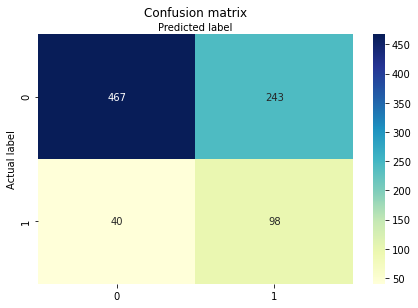

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.6662735849056604
Precision: 0.2873900293255132
Recall: 0.7101449275362319


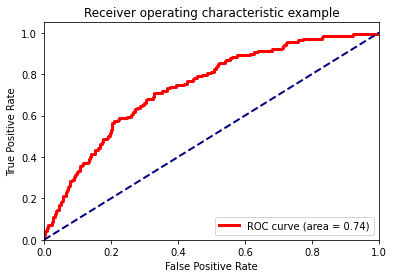

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='red',
        lw=3, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 
#0.74 ROC value indicates the model is good at predicting True positive;  same as before = no improvement

RERUN MODEL WITH test 10%: This section is just to try out different parameters: not part of project rubric

In [ ]:
fr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   male        4238 non-null   int64  
 1   age         4238 non-null   int64  
 2   education   4238 non-null   float64
 3   cigsperday  4238 non-null   float64
 4   bpmeds      4238 non-null   float64
 5   diabetes    4238 non-null   int64  
 6   totchol     4238 non-null   float64
 7   diabp       4238 non-null   float64
 8   bmi         4238 non-null   float64
 9   heartrate   4238 non-null   float64
 10  tenyearchd  4238 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 364.3 KB


In [ ]:
#Create features and target pandas 10% test, and "tenyearchd" as the target variable; again this variable
#predicts who as at risk for heart disease after 10 years.
X = fr.iloc[:,0:-1] 
y = fr.tenyearchd

#check X to verify that target column has been removed and only features remain
X.head()

,male,age,education,cigsperday,bpmeds,diabetes,totchol,diabp,bmi,heartrate
0,1,39,4.0,0.0,0.0,0,195.0,70.0,26.97,80.0
1,0,46,2.0,0.0,0.0,0,250.0,81.0,28.73,95.0
2,1,48,1.0,20.0,0.0,0,245.0,80.0,25.34,75.0
3,0,61,3.0,30.0,0.0,0,225.0,95.0,28.58,65.0
4,0,46,3.0,23.0,0.0,0,285.0,84.0,23.10,85.0


In [ ]:
#Break data into train and test using 10%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [ ]:
#Fit the logistic regression model using the sklearn package
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )


Classes [0 1]
Intercept [-1.95307272]
Coefficients [[ 0.18625963  0.63285008 -0.03930934  0.27934146  0.07315891  0.14029353
   0.09299816  0.22979814  0.04095317  0.01908884]]


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8490566037735849
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       359
           1       1.00      0.02      0.03        65

    accuracy                           0.85       424
   macro avg       0.92      0.51      0.47       424
weighted avg       0.87      0.85      0.78       424



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[359,   0],
       [ 64,   1]])

Text(0.5, 257.44, 'Predicted label')

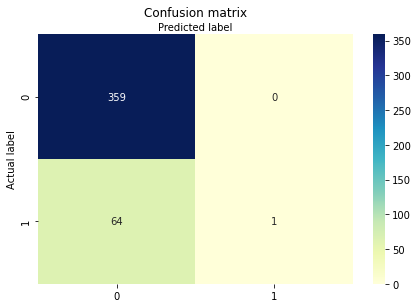

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
#same as original choice of features

Accuracy: 0.8490566037735849
Precision: 1.0
Recall: 0.015384615384615385


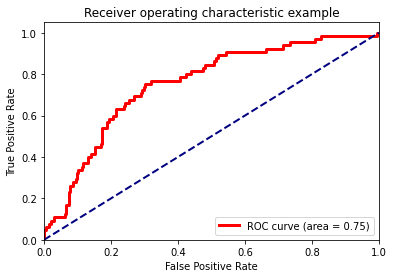

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='red',
        lw=3, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 
#0.75 ROC value indicates the model is good at predicting True positive;  

CONCLUSION: It seems the selected features for predicting risk from this dataset is sufficient for true positive, i.e. people at no risk after 10 years, but not so good for the at risk class. I ran the last iteration with a smaller test data set (10%);  the ROC curve improved (slightly) with a 10% test size, probably not enough to make a difference in choosing 10 or 20%.

Females appear to be at more risk after than 10 years than males in this study.

If I were to speculate on how to design a future study, the role of genetics might add to the accuracy of the at risk group. Many people in the current study turned up falsely as no risk, so there is something separating them from the true no risk pool that appears to be missing from the Framingham study. Asking patients for first degree relatives' information might give some more accuracy to the study's model.